# extra_3.2.1.2_linear_regression_with_matrix_operations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

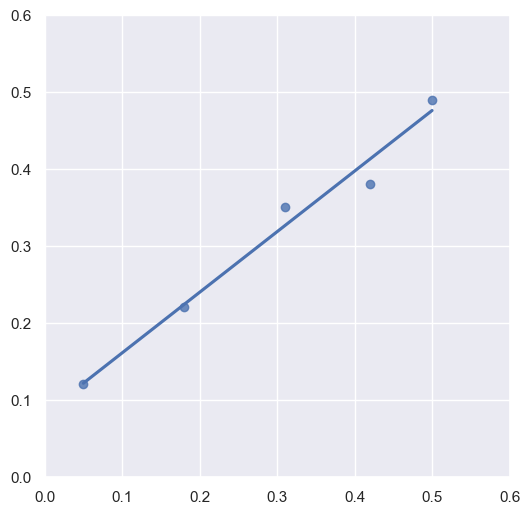

In [3]:
M = np.array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.5, 0.49],
    ])
#print(M)
X_, y_ = M[:,0], M[:,1]
X_ = X_.reshape((len(X_), 1))
## plot figure
plt.figure(figsize=(6,6))
ax = sns.regplot(x=X_, y=y_, ci=None)
ax.set(xlim=(0, 0.6), ylim=(0, 0.6));

In [4]:
## linear regression as function, based on functions of numpy
def MyLinReg(X, y):
    XT = np.matrix.transpose(X)           ## transpose
    XT_X = np.matmul(XT, X)               ## matrix product 1
    XT_X_INV = np.linalg.inv(XT_X)        ## invert
    XT_X_INV_XT = np.matmul(XT_X_INV, XT) ## matrix product 2
    betas = np.matmul(XT_X_INV_XT, y)     ## matrix product 3
    return (betas)

In [5]:
## without intercept
print(MyLinReg(X_, y_))

[1.00233226]


In [6]:
## control with sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(X_, y_)
print(model.intercept_)
print(model.coef_)

0.0
[1.00233226]


In [7]:
## with intercept: add a vector with values 1 on the left of X
X__ = np.c_[np.repeat(1,X_.shape[0]), X_]
print(X__)
print(MyLinReg(X__, y_))

[[1.   0.05]
 [1.   0.18]
 [1.   0.31]
 [1.   0.42]
 [1.   0.5 ]]
[0.08215136 0.78715288]


In [8]:
## control with sklearn
model = LinearRegression(fit_intercept=True).fit(X_, y_)
print(model.intercept_)
print(model.coef_)

0.08215135794934389
[0.78715288]


In [9]:
## the same with melb data
datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price', seed = 1234)

X_train_ = np.c_[np.repeat(1,X_train.shape[0]), X_train]

coefs = MyLinReg(X_train_, y_train)
print(coefs[0])  ## intercept
print(coefs[1:]) ## coefs

-105513872.2875379
[ 2.45383606e+05 -1.41356398e+05 -4.03836664e+04  1.61336040e+05
  4.03911483e+04  8.33032709e+04  2.73783998e+05 -2.48422914e+03
 -4.97722450e+03 -5.15021964e+05  1.92635865e+05 -1.19821800e+00
  9.42690152e+04  4.16608193e+04  5.41816991e+04 -1.85021045e+05
  8.79055467e+04  2.43998169e+05  2.65590236e+05 -2.31675040e+05
  1.75618895e+03  3.11569154e+04  4.70830470e+03]


In [10]:
## control with LinearRegression from sklearn
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

-105513873.23403685
[ 2.45383606e+05 -1.41356398e+05 -4.03836664e+04  1.61336039e+05
  4.03911483e+04  8.33032709e+04  2.73783998e+05 -2.48422914e+03
 -4.97722450e+03 -5.15021962e+05  1.92635869e+05 -1.19821800e+00
  9.42690151e+04  4.16608193e+04  5.41816991e+04 -1.85021045e+05
  8.79055470e+04  2.43998169e+05  2.65590236e+05 -2.31675039e+05
  1.75618897e+03  3.11569156e+04  4.70830468e+03]
